In [39]:
'''
results: 
1) plotting a cloud top height line / scatter points on top of crl data isn't slow because of differences in pyplot / object
   oriented approaches. Instead, it's because the legend was taking forever to choose a 'best' position! I fixed this issue 
   using loc = 'lower left' to manually specify the legend location.
2) There seems to be little difference in execution speed between pyplot vs object oriented plotting. The largest differences
   come from random fluctuations in jupyter notebook execution times (Ex: it sometimes takes 200 ms to plot backscattered power,
   while other times it can take up to 1000 ms! For both cases). I'm not sure what causes these execution time differences: I think
   that closing tabs / programs helps.
3) The object oriented interface can be pretty convenient. So, it might still be worth it to rewrite a lot of code to make plotting
   things easier! I'm not gonna do it now, it's just something to think about.
4) saving a figure, especially at high dpi, tends to add a second or two to each iterations execution! Saving a figure at 300 dpi
   increases the runtime from 350 ms to 6 or 7 seconds! So it's 20 x slower
'''

"\nresults: \n1) plotting a cloud top height line / scatter points on top of crl data isn't slow because of differences in pyplot / object\n   oriented approaches. Instead, it's because the legend was taking forever to choose a 'best' position! I fixed this issue \n   using loc = 'lower left' to manually specify the legend location.\n2) There seems to be little difference in execution speed between pyplot vs object oriented plotting. The largest differences\n   come from random fluctuations in jupyter notebook execution times (Ex: it sometimes takes 200 ms to plot backscattered power,\n   while other times it can take up to 1000 ms! For both cases). I'm not sure what causes these execution time differences: I think\n   that closing tabs / programs helps.\n3) The object oriented interface can be pretty convenient. So, it might still be worth it to rewrite a lot of code to make plotting\n   things easier! I'm not gonna do it now, it's just something to think about.\n"

In [1]:
import os
import matplotlib.pyplot as plt

os.chdir("/Users/etmu9498/research/code/scripts/")
import make_plots
import cloud_height
os.chdir( "/Users/etmu9498/research/code/scripts/object-oriented-scripts/")
import make_plots_oo

In [2]:
# load data: the same for each case!
crl_path = "/Users/etmu9498/research/data/CRL_data/2021/"
crl_list = make_plots.load_crl( crl_path, print_files=False)
crl_data = crl_list[ 18]
i1 = 400
i2 = 1600
xaxis='time'
cutoff_power = -30

CPU times: total: 375 ms
Wall time: 371 ms


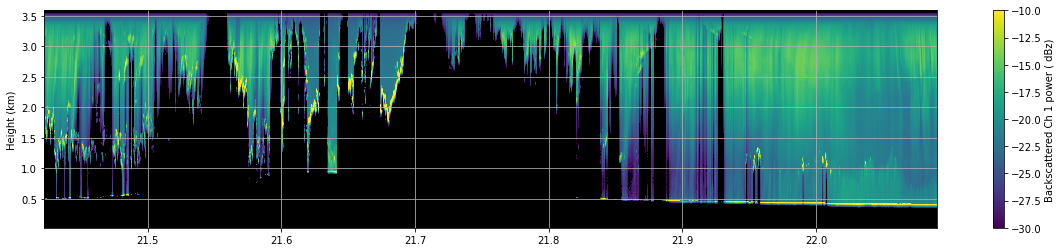

In [3]:
%%time

# how long does the pyplot case take to run for plotting power?
plt.figure( figsize=(20, 4))
make_plots.plot_power_ch1( crl_path, crl_data, i1, i2, xaxis)

CPU times: total: 234 ms
Wall time: 234 ms


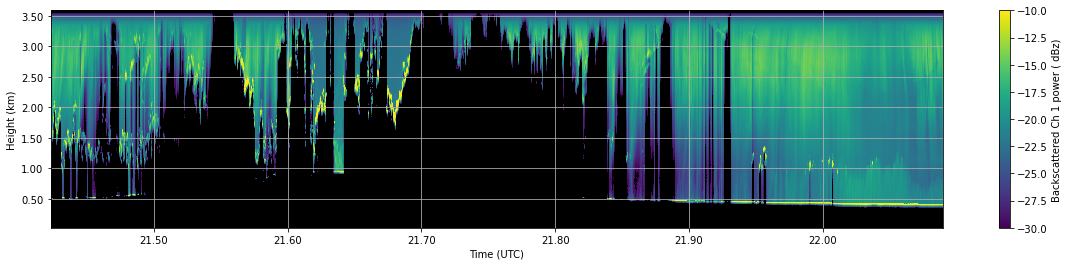

In [4]:
%%time

# how long does the object oriented case take to run for plotting power?
fig, ax, xlims = make_plots_oo.plot_power_ch1( crl_path, crl_data, i1, i2, xaxis)
fig.set_size_inches( 20, 4)

C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


CPU times: total: 297 ms
Wall time: 276 ms


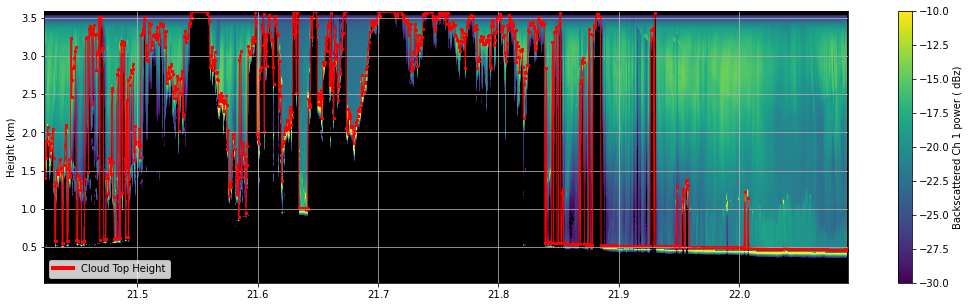

In [5]:
%%time
# how long does the pyplot case take to run for plotting power and cloud tops?

# plot crl power data
plt.figure( figsize=(18, 5))
make_plots.plot_power_ch1( crl_path, crl_data, i1, i2, xaxis)

# load and plot cloud top height calcs
H, xaxis_value = cloud_height.find_cloud_heights(crl_data, cutoff_power, i1, i2, xaxis = xaxis)
plt.scatter( xaxis_value, H, c= 'r', s=8, marker='s')
plt.plot( xaxis_value, H, c=  'r', linewidth=1, label= 'Cloud Top Height')

# make lines in legend thicker
leg = plt.legend( loc='lower left')
for line in leg.get_lines():
    line.set_linewidth(4.0)

C:\Users\etmu9498\Anaconda3\envs\tcresearch\lib\site-packages\xarray\core\computation.py:727: RuntimeWarning: invalid value encountered in log10
  result_data = func(*input_data)


CPU times: total: 266 ms
Wall time: 288 ms


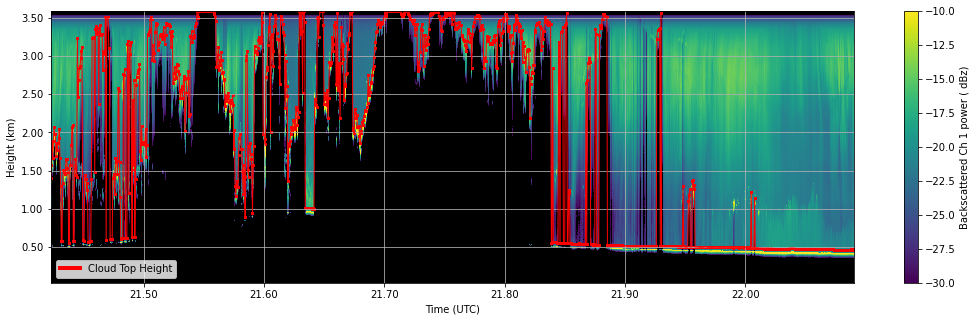

In [6]:
%%time
# how long does the object oriented case take to run for plotting power and cloud tops?

# plot crl power data
fig, ax1, xlims = make_plots_oo.plot_power_ch1( crl_path, crl_data, i1, i2, xaxis)
fig.set_size_inches( 18, 5)

# load and plot cloud top height calcs
H, xaxis_value = cloud_height.find_cloud_heights(crl_data, cutoff_power, i1, i2, xaxis = xaxis)

# this code isn't necessary
# ax2 = ax1.twinx()
# ax3 = ax2.twiny()

ax1.scatter( xaxis_value, H, c= 'r', s=8, marker='s')
ax1.plot( xaxis_value, H, c=  'r', linewidth=1, label= 'Cloud Top Height')
ax1.set_xlim( xlims)

# adding a legend using legend() really slows down displaying the crl plot!
# This is because the base function uses loc = best, which searches for the best place to put the legend
# This searching process takes a while. Use loc= 'upper right' to add a legend location manually and speed things up!
leg = ax1.legend( loc='lower left')
# make lines in legend thicker
for line in leg.get_lines():
    line.set_linewidth(4.0)